# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# Load Dataframe

#### train_df

In [2]:
train_df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\pharma project-6\Pharma-project-6\train.zip")
test_df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\pharma project-6\Pharma-project-6\test.csv")
store_df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\pharma project-6\Pharma-project-6\store.csv")
sample_df = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\pharma project-6\Pharma-project-6\sample_submission.csv")

# Data Exploration


In [3]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
train_df.shape

(1017209, 9)

In [5]:
train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [8]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
train_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

#### test_df

In [11]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [12]:
test_df.shape

(41088, 8)

In [13]:
test_df.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [14]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [15]:
test_df.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [16]:
test_df.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [18]:
test_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41083    False
41084    False
41085    False
41086    False
41087    False
Length: 41088, dtype: bool

#### store_df

In [19]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
store_df.shape

(1115, 10)

In [21]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [22]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [23]:
store_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [24]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [25]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [26]:
store_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

# sample_df

In [27]:
sample_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [28]:
sample_df.shape

(41088, 2)

In [29]:
sample_df.tail()

,Id,Sales
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0
41087,41088,0


In [30]:
sample_df.isnull().sum()

Id       0
Sales    0
dtype: int64

In [31]:
sample_df.dtypes

Id       int64
Sales    int64
dtype: object

In [32]:
sample_df.describe()

,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


In [33]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [34]:
sample_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41083    False
41084    False
41085    False
41086    False
41087    False
Length: 41088, dtype: bool

In [35]:
train_df.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [36]:
test_df.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [37]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [38]:
sample_df.columns

Index(['Id', 'Sales'], dtype='object')

# Handling Missing Values

In [39]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# Display missing values table for each dataframe
print("Train Dataset")
print(missing_values_table(train_df))
print("\nTest Dataset")
print(missing_values_table(test_df))
print("\nStore Dataset")
print(missing_values_table(store_df))
print("\nSample Submission Dataset")
print(missing_values_table(sample_df))


Train Dataset
Your selected dataframe has 9 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

Test Dataset
Your selected dataframe has 8 columns.
There are 1 columns that have missing values.
      Missing Values  % of Total Values
Open              11                0.0

Store Dataset
Your selected dataframe has 10 columns.
There are 6 columns that have missing values.
                           Missing Values  % of Total Values
Promo2SinceWeek                       544               48.8
Promo2SinceYear                       544               48.8
PromoInterval                         544               48.8
CompetitionOpenSinceMonth             354               31.7
CompetitionOpenSinceYear              354               31.7
CompetitionDistance                     3                0.3

Sample Submission Dataset
Your selected dataframe has 2 columns.
There are 0 columns that have missing values.
Empty DataF

In [40]:
# Impute missing values in CompetitionDistance with a high value or median
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)

In [41]:
# Impute missing values with placeholders
store_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)


#

In [42]:
# For rows where Promo2 is 0, set related fields to a non-applicable value
condition = store_df['Promo2'] == 0
store_df.loc[condition, 'Promo2SinceWeek'] = 0
store_df.loc[condition, 'Promo2SinceYear'] = 0
store_df.loc[condition, 'PromoInterval'] = "None"


In [43]:
# Fill missing 'Open' values with 1 (open) as a default assumption
test_df['Open'].fillna(1, inplace=True)


In [44]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# Display missing values table for each dataframe
print("Train Dataset")
print(missing_values_table(train_df))
print("\nTest Dataset")
print(missing_values_table(test_df))
print("\nStore Dataset")
print(missing_values_table(store_df))
print("\nSample Submission Dataset")
print(missing_values_table(sample_df))


Train Dataset
Your selected dataframe has 9 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

Test Dataset
Your selected dataframe has 8 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

Store Dataset
Your selected dataframe has 10 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

Sample Submission Dataset
Your selected dataframe has 2 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [45]:
# Save the Train Dataset
train_df.to_csv('train_dataset_cleaned.csv', index=False)
print("Train dataset saved successfully.")

# Save the Test Dataset
test_df.to_csv('test_dataset_cleaned.csv', index=False)
print("Test dataset saved successfully.")

# Save the Store Dataset
store_df.to_csv('store_dataset_cleaned.csv', index=False)
print("Store dataset saved successfully.")



Train dataset saved successfully.
Test dataset saved successfully.
Store dataset saved successfully.


In [46]:
# Merge train_df with store_df
train_store_merged_df = pd.merge(train_df, store_df, on="Store", how="left")

# Merge test_df with store_df
test_store_merged_df = pd.merge(test_df, store_df, on="Store", how="left")

# Save the merged train dataset
train_store_merged_df.to_csv('train_store_merged_dataset.csv', index=False)
print("Merged train dataset saved successfully.")

# Save the merged test dataset
test_store_merged_df.to_csv('test_store_merged_dataset.csv', index=False)
print("Merged test dataset saved successfully.")


Merged train dataset saved successfully.
Merged test dataset saved successfully.


# Building Pipelines

In [47]:
# Numeric features to process
numeric_features = ['CompetitionDistance', 'Promo2SinceWeek', 'Promo2SinceYear']  # Example features
# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features to process
categorical_features = ['StoreType', 'Assortment', 'PromoInterval']  # Example features
# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine processing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [48]:
# Assuming 'train_store_merged_df' and 'test_store_merged_df' need to be processed
train_processed = preprocessor.fit_transform(train_store_merged_df)
test_processed = preprocessor.transform(test_store_merged_df)


In [49]:
# Correcting the code for Scikit-learn version 0.23 and above
processed_columns = numeric_features + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features))

train_processed_df = pd.DataFrame(train_processed, columns=processed_columns)
train_processed_df.head(2)

,CompetitionDistance,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
0,-0.538740,-0.760097,-1.001128,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.629567,0.088250,0.997130,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
train_processed_df.to_csv('pipline.csv', index=False)

# Task 1 - Exploration of customer purchasing behaviour

### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [51]:
# Calculate the distribution of promotions in the test set
promo_distribution_train = train_df['Promo'].value_counts(normalize=True) * 100

# Display the distribution
print(promo_distribution_train)


Promo
0    61.848548
1    38.151452
Name: proportion, dtype: float64


In [52]:
# Calculate the distribution of promotions in the test set
promo_distribution_test = test_df['Promo'].value_counts(normalize=True) * 100

# Display the distribution
print(promo_distribution_test)


Promo
0    60.416667
1    39.583333
Name: proportion, dtype: float64


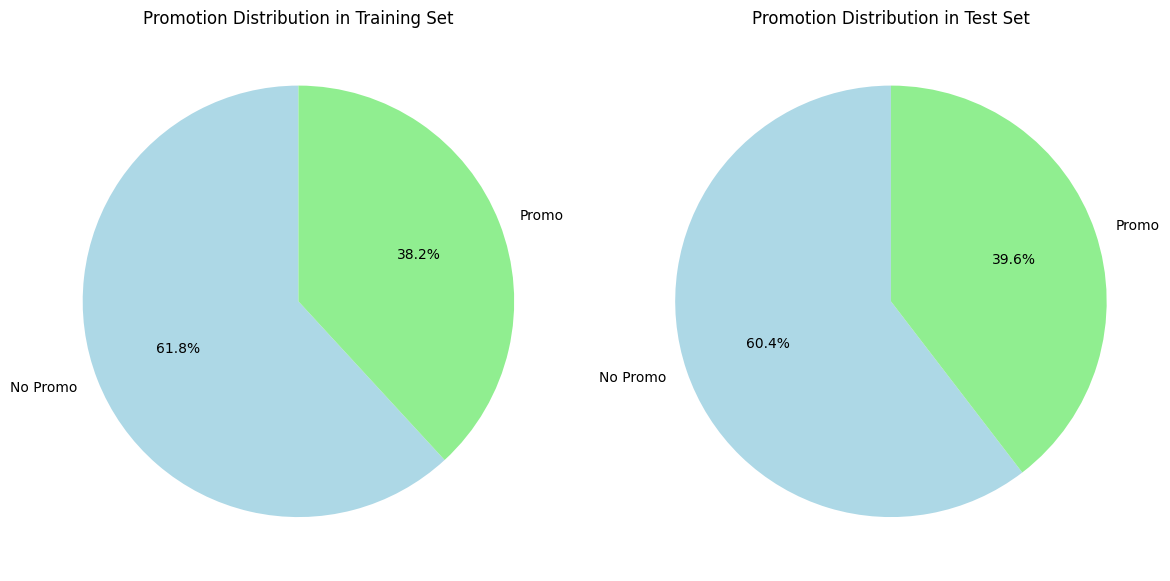

In [53]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Training set pie chart
axs[0].pie(promo_distribution_train, labels=['No Promo', 'Promo'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
axs[0].set_title('Promotion Distribution in Training Set')

# Test set pie chart
axs[1].pie(promo_distribution_test, labels=['No Promo', 'Promo'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
axs[1].set_title('Promotion Distribution in Test Set')

plt.tight_layout()  # Adjust layout to make room for the plots
plt.show()

# Detecting and Handling Outliers

In [54]:
q1 = np.percentile(train_df["Sales"], 25)
q2 = np.percentile(train_df["Sales"], 50)
q3 = np.percentile(train_df["Sales"], 75)

print(f"My Q1 = {q1}, Median(q2) = {q2}, Q3 = {q3}")

My Q1 = 3727.0, Median(q2) = 5744.0, Q3 = 7856.0


In [55]:
iqr=q3-q1
iqr
lower_range=q1-iqr*1.5
upper_range=q3+iqr*1.5
print(f"Lower range= {lower_range} , Upper Range= {upper_range}")
     

Lower range= -2466.5 , Upper Range= 14049.5


In [56]:
#  first quartile (Q1) and third quartile (Q3) for the "Sales" column
Q1_sales = train_df['Sales'].quantile(0.25)
Q3_sales = train_df['Sales'].quantile(0.75)

# interquartile range (IQR) for "Sales"
IQR_sales = Q3_sales - Q1_sales

# lower and upper bounds for outlier detection for "Sales"
lower_range_sales = Q1_sales - 1.5 * IQR_sales
upper_range_sales = Q3_sales + 1.5 * IQR_sales

# Identifying outliers in the "Sales" column
outliers_lower_sales = train_df[train_df['Sales'] < lower_range_sales]
outliers_upper_sales = train_df[train_df['Sales'] > upper_range_sales]

In [57]:
# Print summary statistics and count of outliers
print("Summary Statistics for Sales:")
print(train_store_merged_df['Sales'].describe())

Summary Statistics for Sales:
count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64


In [58]:
print("\nOutliers (lower bound):")
print(outliers_lower_sales['Sales'].describe())
print(f"Number of outliers (lower bound): {outliers_lower_sales.shape[0]}")



Outliers (lower bound):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Sales, dtype: float64
Number of outliers (lower bound): 0


In [59]:
print("\nOutliers (upper bound):")
print(outliers_upper_sales['Sales'].describe())
print(f"Number of outliers (upper bound): {outliers_upper_sales.shape[0]}")



Outliers (upper bound):
count    26694.000000
mean     17212.576309
std       3079.017171
min      14050.000000
25%      14956.000000
50%      16288.000000
75%      18530.750000
max      41551.000000
Name: Sales, dtype: float64
Number of outliers (upper bound): 26694


In [60]:
train_store_merged_df['Sales'] = train_store_merged_df['Sales'].clip(lower_range_sales, upper_range_sales)

In [61]:
# Calculate the first and third quartile
Q1_customers = train_store_merged_df['Customers'].quantile(0.25)
Q3_customers = train_store_merged_df['Customers'].quantile(0.75)

# Calculate the interquartile range
IQR_customers = Q3_customers - Q1_customers

# Calculate the bounds for outliers
lower_bound_customers = Q1_customers - 1.5 * IQR_customers
upper_bound_customers = Q3_customers + 1.5 * IQR_customers

# Identifying outliers in the "Customers" column
outliers_lower_customers = train_store_merged_df[train_store_merged_df['Customers'] < lower_bound_customers]
outliers_upper_customers = train_store_merged_df[train_store_merged_df['Customers'] > upper_bound_customers]

print(f"Outliers (lower bound): {len(outliers_lower_customers)}")
print(f"Outliers (upper bound): {len(outliers_upper_customers)}")


Outliers (lower bound): 0
Outliers (upper bound): 38095


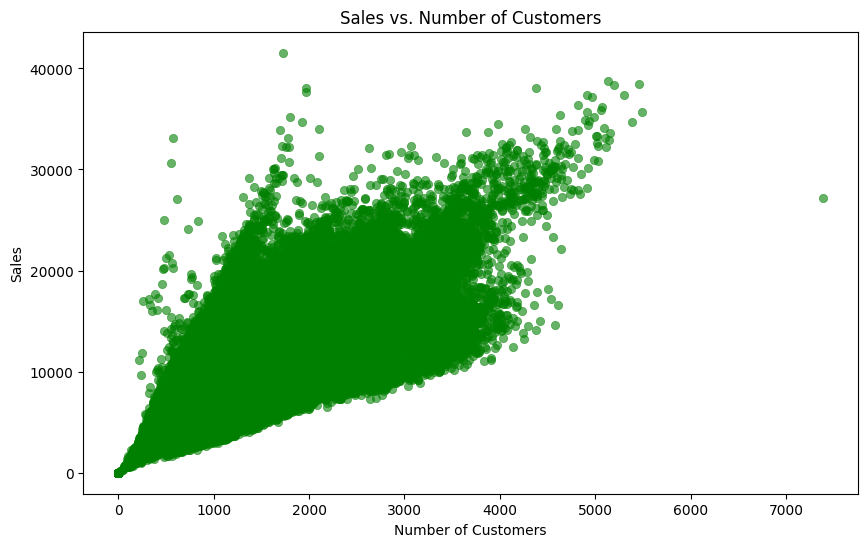

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Customers', y='Sales', alpha=0.6, edgecolor=None, color='green')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.title('Sales vs. Number of Customers')
plt.show()

In [63]:
train_store_merged_df.to_csv('outliers.csv', index=False)

### Check & compare sales behavior before, during and after holidays

In [64]:
from sklearn.linear_model import LinearRegression
train_store_merged_df['Date'] = pd.to_datetime(train_store_merged_df['Date'])

In [65]:
# Define Christmas dates for the years covered by the dataset
christmas_date = pd.to_datetime(['2013-12-25', '2014-12-25', '2015-12-25'])

In [66]:
# Create empty DataFrames to hold before, during, and after holiday sales data
before_holiday_sales = pd.DataFrame()
during_holiday_sales = pd.DataFrame()
after_holiday_sales = pd.DataFrame()

# Loop through each Christmas date
for date in christmas_date:
    # Define periods relative to each Christmas date
    before_period = (train_store_merged_df['Date'] >= date - pd.Timedelta(days=7)) & (train_store_merged_df['Date'] < date)
    during_period = (train_store_merged_df['Date'] == date)
    after_period = (train_store_merged_df['Date'] > date) & (train_store_merged_df['Date'] <= date + pd.Timedelta(days=7))
    
    # Concatenate the sales data for each period
    before_holiday_sales = pd.concat([before_holiday_sales, train_store_merged_df[before_period]])
    during_holiday_sales = pd.concat([during_holiday_sales, train_store_merged_df[during_period]])
    after_holiday_sales = pd.concat([after_holiday_sales, train_store_merged_df[after_period]])

# Ensure no duplicate rows are included due to overlapping periods
before_holiday_sales.drop_duplicates(inplace=True)
during_holiday_sales.drop_duplicates(inplace=True)
after_holiday_sales.drop_duplicates(inplace=True)


In [67]:
# Calculate total sales
total_before = before_holiday_sales['Sales'].sum()
total_during = during_holiday_sales['Sales'].sum()
total_after = after_holiday_sales['Sales'].sum()

# Calculate average sales per day
avg_before = before_holiday_sales['Sales'].mean()
avg_during = during_holiday_sales['Sales'].mean()
avg_after = after_holiday_sales['Sales'].mean()

# Print results
print("Total Sales Before Holidays:", total_before)
print("Total Sales During Holidays:", total_during)
print("Total Sales After Holidays:", total_after)
print("Average Sales Before Holidays:", avg_before)
print("Average Sales During Holidays:", avg_during)
print("Average Sales After Holidays:", avg_after)


Total Sales Before Holidays: 114198105.5
Total Sales During Holidays: 274952.5
Total Sales After Holidays: 54401112.0
Average Sales Before Holidays: 7958.056132404181
Average Sales During Holidays: 134.12317073170732
Average Sales After Holidays: 3744.0545079146596


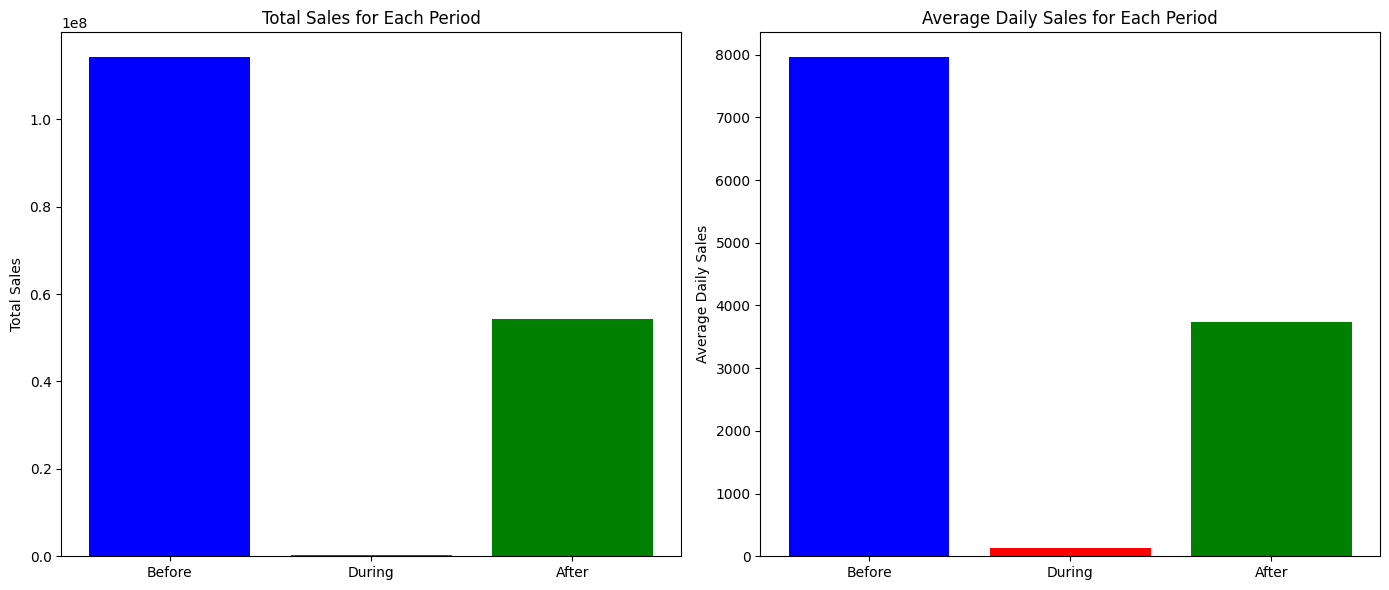

In [68]:
# Prepare data for plotting
periods = ['Before', 'During', 'After']
totals = [total_before, total_during, total_after]
averages = [avg_before, avg_during, avg_after]

# Create subplots for total and average sales
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Total sales plot
ax[0].bar(periods, totals, color=['blue', 'red', 'green'])
ax[0].set_title('Total Sales for Each Period')
ax[0].set_ylabel('Total Sales')

# Average sales plot
ax[1].bar(periods, averages, color=['blue', 'red', 'green'])
ax[1].set_title('Average Daily Sales for Each Period')
ax[1].set_ylabel('Average Daily Sales')

plt.tight_layout()
plt.show()

In [69]:
train_store_merged_df['Date'] = pd.to_datetime(train_store_merged_df['Date'])

In [70]:
daily_sales_before = before_holiday_sales.groupby('Date')['Sales'].sum()
daily_sales_during = during_holiday_sales.groupby('Date')['Sales'].sum()
daily_sales_after = after_holiday_sales.groupby('Date')['Sales'].sum()


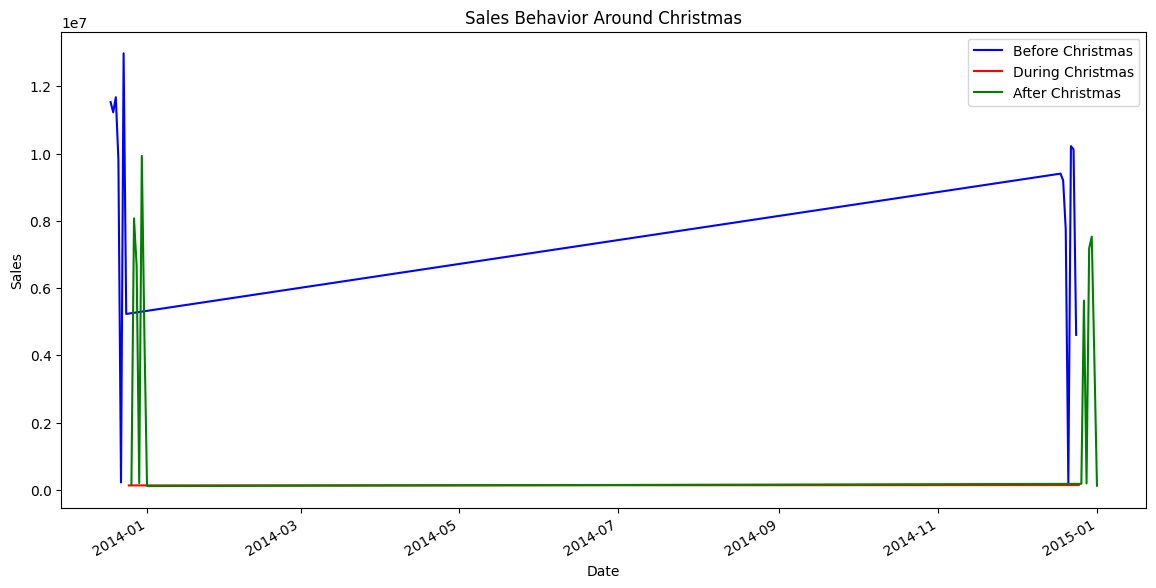

In [71]:
plt.figure(figsize=(14, 7))
daily_sales_before.plot(label='Before Christmas', color='blue')
daily_sales_during.plot(label='During Christmas', color='red')
daily_sales_after.plot(label='After Christmas', color='green')

plt.title('Sales Behavior Around Christmas')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# ●	Find out any seasonal (Christmas, Easter etc) purchase behaviours,

In [72]:
# Define Christmas dates for analysis (example years)
christmas_dates = pd.to_datetime(['2013-12-25', '2014-12-25', '2015-12-25'])

# Define Easter dates for analysis (example years)
easter_dates = pd.to_datetime(['2013-03-31', '2014-04-20', '2015-04-05'])

In [73]:
# Define a function to create subsets of data around a holiday
def create_holiday_subsets(train_store_merged_df, holiday_dates, days_before=7, days_after=7):
    frames_before, frames_during, frames_after = [], [], []
    for date in holiday_dates:
        before_period = train_store_merged_df[(train_store_merged_df['Date'] >= date - pd.Timedelta(days=days_before)) & (train_store_merged_df['Date'] < date)]
        during_period = train_store_merged_df[train_store_merged_df['Date'] == date]
        after_period = train_store_merged_df[(train_store_merged_df['Date'] > date) & (train_store_merged_df['Date'] <= date + pd.Timedelta(days=days_after))]
        
        frames_before.append(before_period)
        frames_during.append(during_period)
        frames_after.append(after_period)
        
    # Concatenate the lists of DataFrames into single DataFrames for each period
    return pd.concat(frames_before), pd.concat(frames_during), pd.concat(frames_after)

# Apply function for Christmas
before_christmas, during_christmas, after_christmas = create_holiday_subsets(train_store_merged_df, christmas_dates)

# Apply function for Easter
before_easter, during_easter, after_easter = create_holiday_subsets(train_store_merged_df, easter_dates)


In [74]:
# Function to calculate sales summaries
def calculate_sales_summary(train_store_merged_df, period_name):
    summary = train_store_merged_df.groupby('Date')['Sales'].sum().describe()
    print(f"Sales Summary for {period_name}:")
    print(summary)
    print("\n")

calculate_sales_summary(before_christmas, "Before Christmas")
calculate_sales_summary(during_christmas, "During Christmas")
calculate_sales_summary(after_christmas, "After Christmas")

calculate_sales_summary(before_easter, "Before Easter")
calculate_sales_summary(during_easter, "During Easter")
calculate_sales_summary(after_easter, "After Easter")


Sales Summary for Before Christmas:
count    1.400000e+01
mean     8.157008e+06
std      4.088759e+06
min      2.160930e+05
25%      5.859787e+06
50%      9.607276e+06
75%      1.097559e+07
max      1.298003e+07
Name: Sales, dtype: float64


Sales Summary for During Christmas:
count         2.000000
mean     137476.250000
std        7193.750838
min      132389.500000
25%      134932.875000
50%      137476.250000
75%      140019.625000
max      142563.000000
Name: Sales, dtype: float64


Sales Summary for After Christmas:
count    1.400000e+01
mean     3.885794e+06
std      3.643492e+06
min      1.125205e+05
25%      1.827139e+05
50%      4.204836e+06
75%      7.052786e+06
max      9.930646e+06
Name: Sales, dtype: float64


Sales Summary for Before Easter:
count    2.100000e+01
mean     7.304250e+06
std      4.678585e+06
min      1.746185e+05
25%      2.205620e+05
50%      9.480790e+06
75%      1.072805e+07
max      1.174993e+07
Name: Sales, dtype: float64


Sales Summary for During Eas

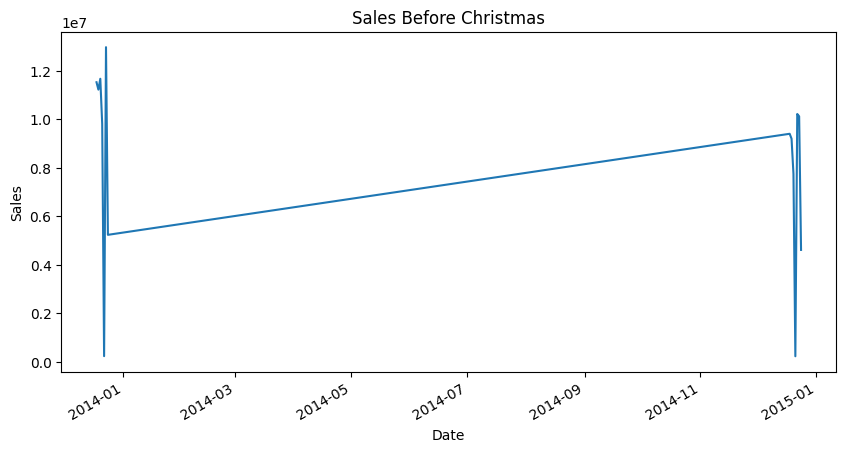

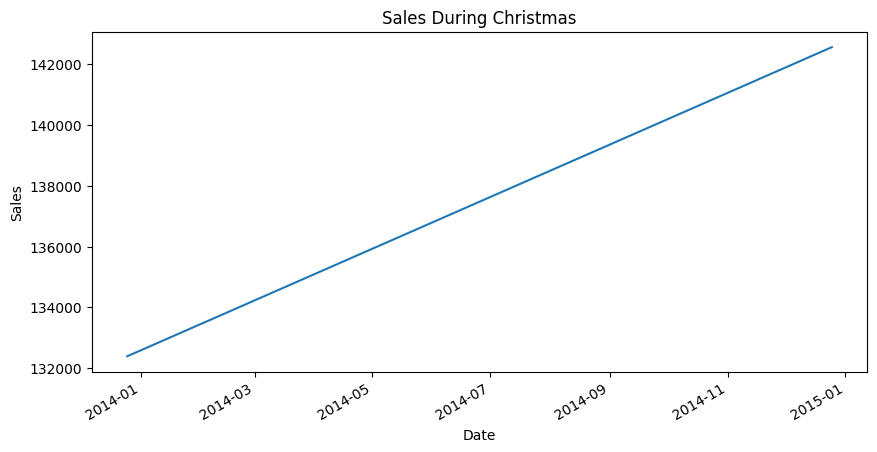

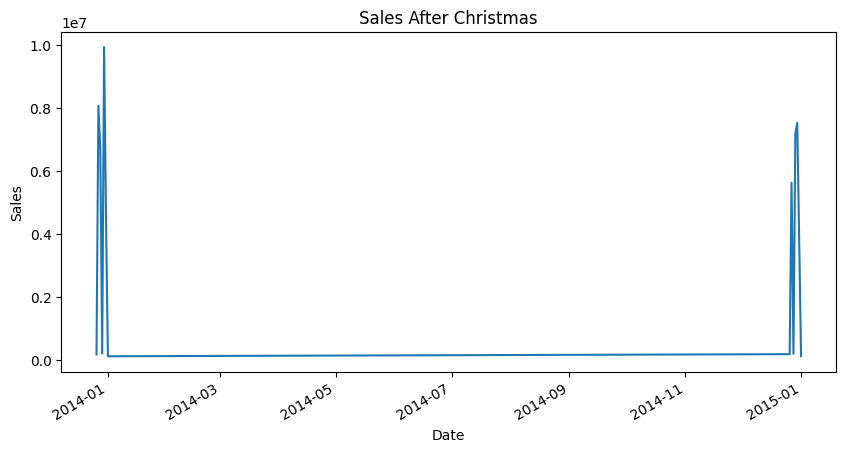

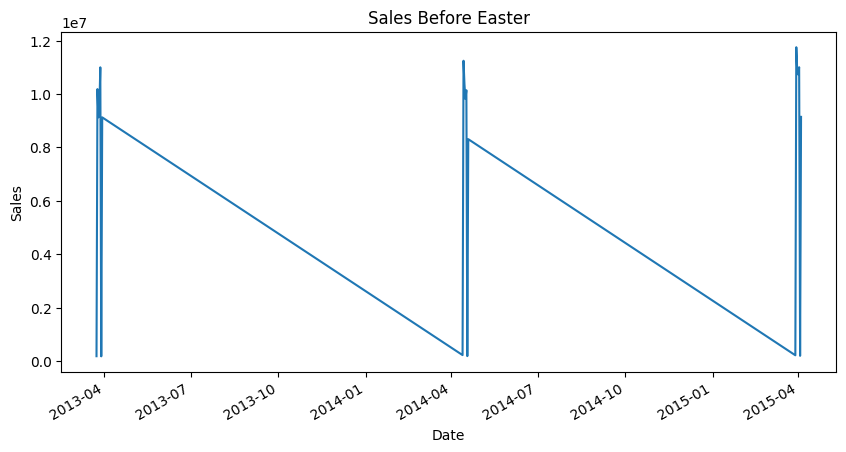

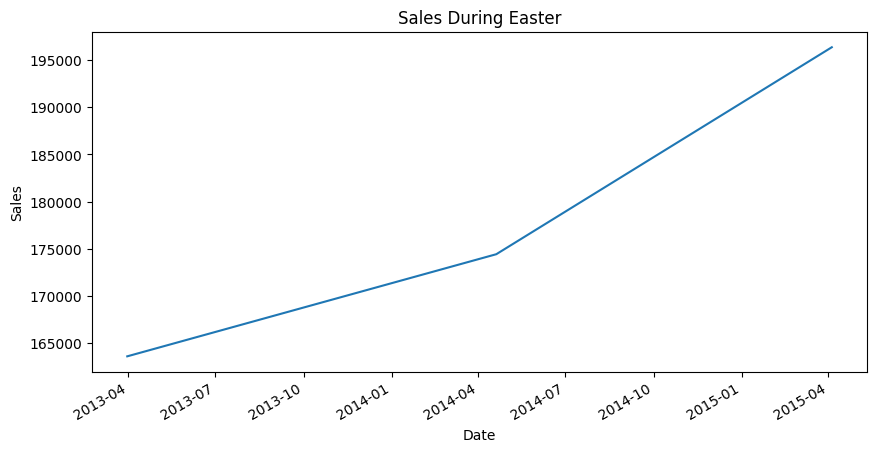

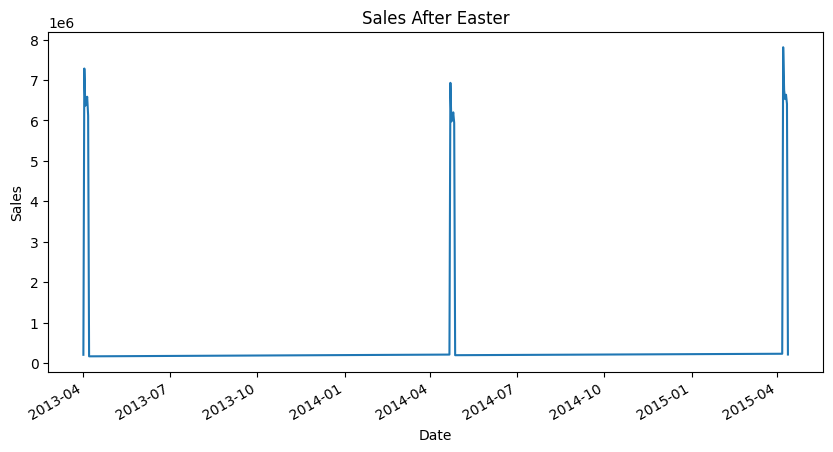

In [75]:
# Plotting function
def plot_sales(df, title):
    daily_sales = df.groupby('Date')['Sales'].sum()
    daily_sales.plot(figsize=(10, 5), title=title)
    plt.ylabel('Sales')
    plt.show()

plot_sales(before_christmas, 'Sales Before Christmas')
plot_sales(during_christmas, 'Sales During Christmas')
plot_sales(after_christmas, 'Sales After Christmas')

plot_sales(before_easter, 'Sales Before Easter')
plot_sales(during_easter, 'Sales During Easter')
plot_sales(after_easter, 'Sales After Easter')

# ●	What can you say about the correlation between sales and number of customers?

In [76]:
# Example of mapping ordinal data
train_store_merged_df['StoreType'] = train_store_merged_df['StoreType'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4})


In [77]:
train_store_merged_df = pd.get_dummies(train_store_merged_df, columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])


In [78]:
# Handling NaN values if necessary
train_store_merged_df.fillna(0, inplace=True)


In [79]:
print(train_store_merged_df[['Sales', 'Customers']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Sales      1017209 non-null  float64
 1   Customers  1017209 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 15.5 MB
None


In [80]:
print(train_store_merged_df[['Sales', 'Customers']].describe())


              Sales     Customers
count  1.017209e+06  1.017209e+06
mean   5.690812e+03  6.331459e+02
std    3.595807e+03  4.644117e+02
min    0.000000e+00  0.000000e+00
25%    3.727000e+03  4.050000e+02
50%    5.744000e+03  6.090000e+02
75%    7.856000e+03  8.370000e+02
max    1.404950e+04  7.388000e+03


In [81]:
correlation = train_store_merged_df['Sales'].corr(train_store_merged_df['Customers'])
print(f"Correlation between sales and number of customers: {correlation}")


Correlation between sales and number of customers: 0.8698480095488026


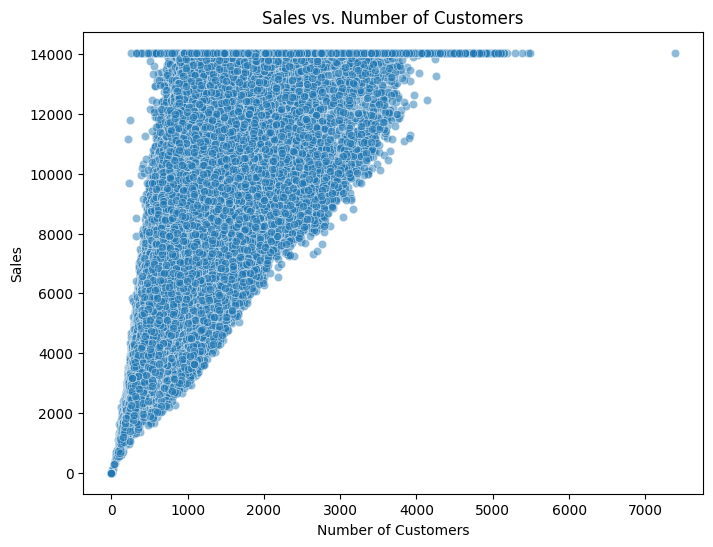

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_store_merged_df, alpha=0.5)
plt.title('Sales vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


In [83]:
# Calculate the correlation matrix
correlation_matrix = train_store_merged_df.corr()
correlation_matrix

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_2,StoreType_3,StoreType_4,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
Store,1.000000,-8.483588e-06,0.000842,0.003404,0.024325,-0.000047,5.786226e-05,0.000641,-0.026451,-0.032893,...,0.001412,0.060986,-0.051492,-0.006140,0.019328,0.002661,8.035330e-03,0.012181,-0.013087,-0.008488
DayOfWeek,-0.000008,1.000000e+00,0.000183,-0.481886,-0.386445,-0.528963,-3.929253e-01,-0.205388,-0.000025,0.000008,...,-0.000019,-0.000039,0.000071,0.000052,-0.000007,-0.000051,-3.017220e-07,0.000198,-0.000019,-0.000168
Date,0.000842,1.827864e-04,1.000000,0.043093,0.012679,-0.000157,1.724860e-02,0.001068,0.002070,-0.000593,...,0.001602,0.003294,-0.006113,-0.004385,0.000572,0.004287,-5.369209e-06,-0.017044,0.001587,0.014508
Sales,0.003404,-4.818863e-01,0.043093,1.000000,0.869848,0.715977,4.685572e-01,0.088484,-0.012094,-0.010347,...,0.122647,-0.002487,-0.014631,-0.080384,0.067639,0.068272,-4.036100e-02,-0.030781,-0.051718,0.084233
Customers,0.024325,-3.864447e-01,0.012679,0.869848,1.000000,0.616768,3.161695e-01,0.071568,-0.102362,-0.015188,...,0.366726,0.034059,-0.189039,-0.031864,0.275905,-0.017859,-6.547287e-02,-0.078401,-0.063053,0.150159
Open,-0.000047,-5.289625e-01,-0.000157,0.715977,0.616768,1.000000,2.950423e-01,0.086171,0.007987,-0.000200,...,0.051233,-0.004709,-0.005538,-0.006438,0.038631,-0.000522,-3.608057e-03,-0.005269,-0.002074,0.008309
Promo,0.000058,-3.929253e-01,0.017249,0.468557,0.316169,0.295042,1.000000e+00,0.067483,0.000140,-0.000039,...,0.000108,0.000223,-0.000414,-0.000296,0.000039,0.000290,-6.029887e-07,-0.001154,0.000107,0.000983
SchoolHoliday,0.000641,-2.053883e-01,0.001068,0.088484,0.071568,0.086171,6.748281e-02,1.000000,-0.003666,-0.001688,...,0.001825,0.001557,-0.000899,0.002464,0.000608,-0.002576,-2.109399e-03,-0.004427,-0.002624,0.006909
CompetitionDistance,-0.026451,-2.485045e-05,0.002070,-0.012094,-0.102362,0.007987,1.396374e-04,-0.003666,1.000000,-0.033190,...,-0.071063,-0.097468,0.130827,-0.141425,-0.049778,0.150553,-5.118948e-02,-0.081948,-0.054600,0.139227
CompetitionOpenSinceMonth,-0.032893,8.338445e-06,-0.000593,-0.010347,-0.015188,-0.000200,-3.919081e-05,-0.001688,-0.033190,1.000000,...,-0.039814,0.015645,-0.041428,0.100431,-0.051397,-0.091268,-1.794370e-02,-0.056377,-0.031330,0.081027


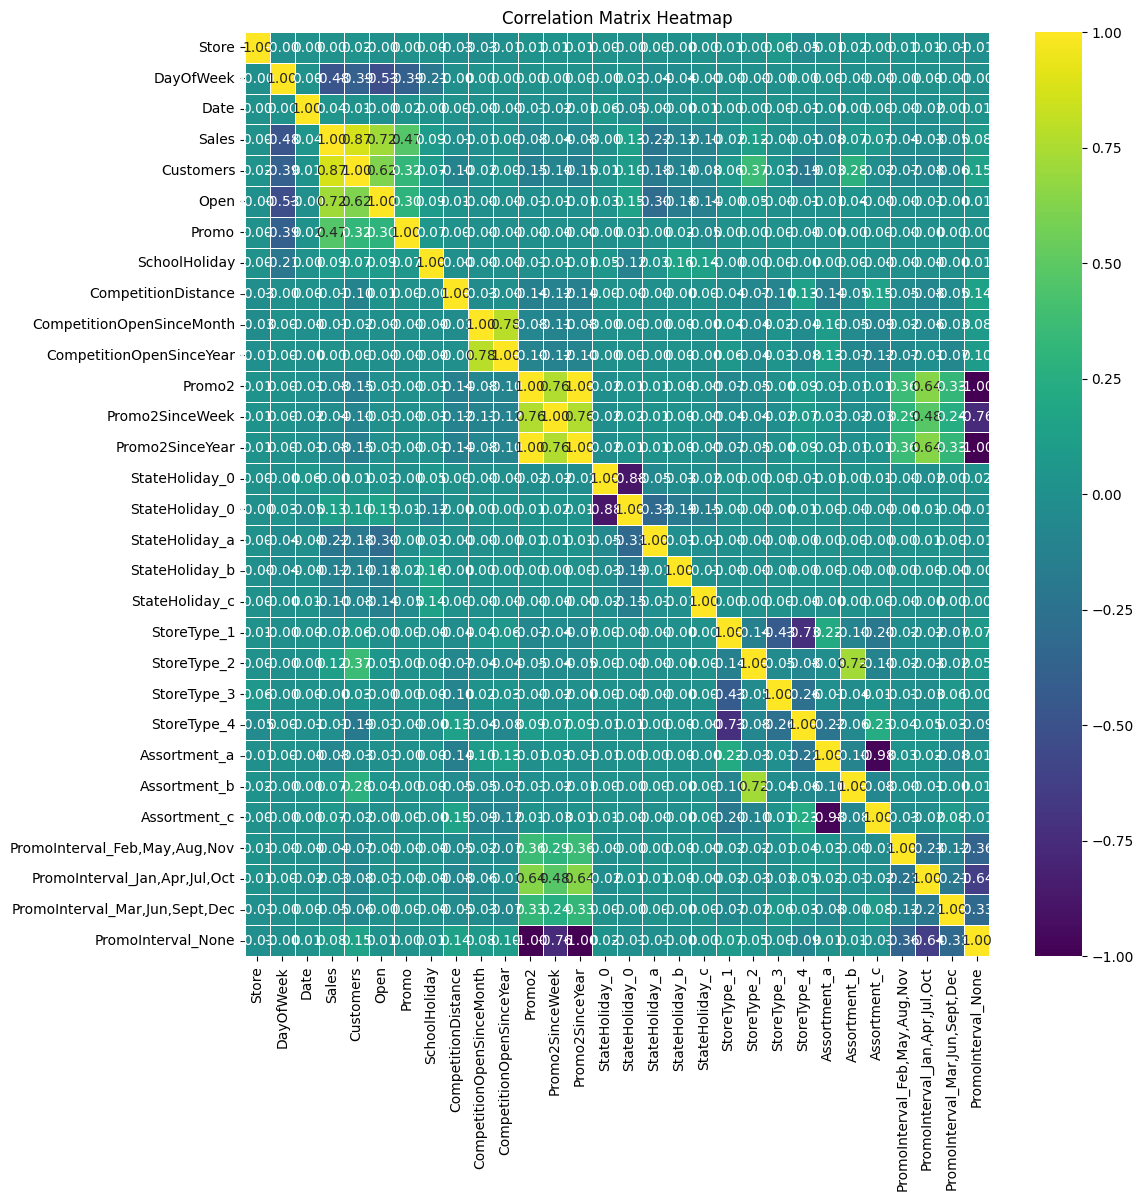

In [84]:
# Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [85]:
correlation_matrix.to_csv('corr_matrix.csv', index=False)

# ●	How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [86]:
promo_grouped = train_store_merged_df.groupby('Promo')[['Sales', 'Customers']].mean().reset_index()


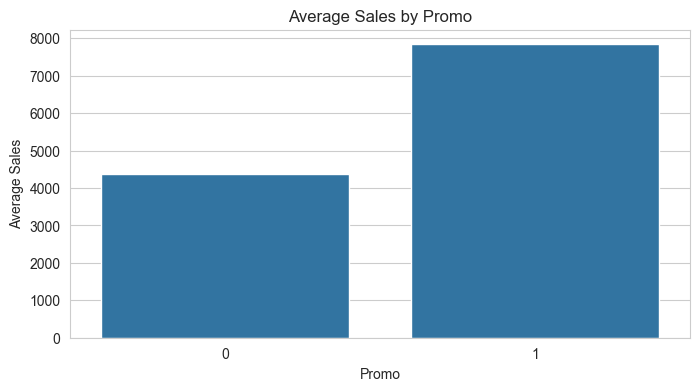

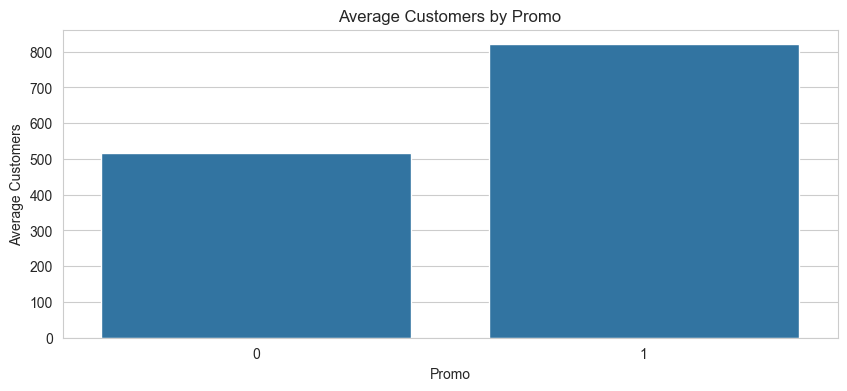

In [87]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot for Sales
plt.figure(figsize=(8, 4))
sns.barplot(x='Promo', y='Sales', data=promo_grouped)
plt.title('Average Sales by Promo')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.show()

# Plot for Customers
plt.figure(figsize=(10, 4))
sns.barplot(x='Promo', y='Customers', data=promo_grouped)
plt.title('Average Customers by Promo')
plt.xlabel('Promo')
plt.ylabel('Average Customers')
plt.show()


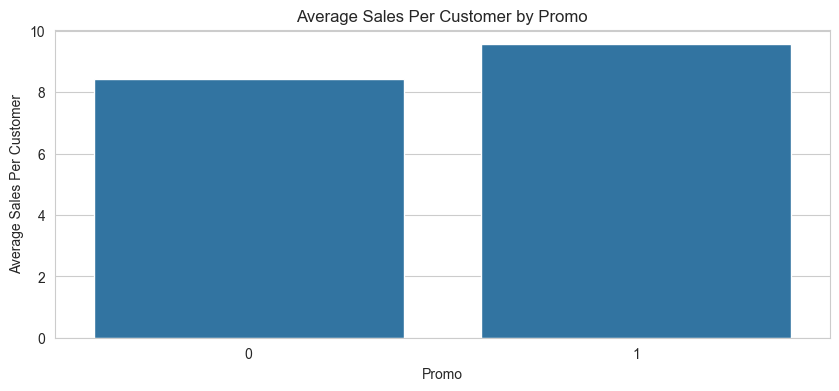

In [88]:
# Analyzing the Effect on Existing Customers
promo_grouped['SalesPerCustomer'] = promo_grouped['Sales'] / promo_grouped['Customers']

plt.figure(figsize=(10, 4))
sns.barplot(x='Promo', y='SalesPerCustomer', data=promo_grouped)
plt.title('Average Sales Per Customer by Promo')
plt.xlabel('Promo')
plt.ylabel('Average Sales Per Customer')
plt.show()


#### Interpretation
Sales and Customers: If the bar plots show significantly higher sales and customer counts during promo days, it suggests that promotions are effective in attracting more traffic and increasing revenue.

Sales Per Customer: An increase in average sales per customer during promo days indicates that promotions encourage customers to purchase more items or more expensive items than they would on non-promo days. Conversely, if the sales per customer do not significantly increase or decrease, it suggests that while promotions may attract more customers, they do not necessarily encourage existing customers to spend more.

# ●	Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

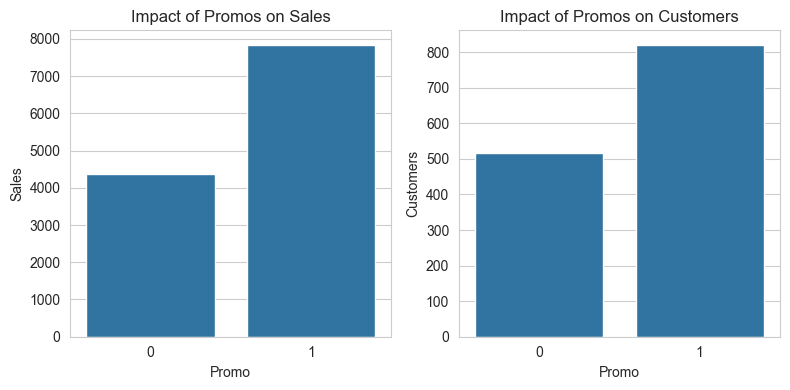

In [89]:
# Group data by Promo and calculate mean sales and customers
promo_impact = train_store_merged_df.groupby('Promo')[['Sales', 'Customers']].mean().reset_index()

# Visualizing the impact of promos on Sales and Customers
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='Promo', y='Sales', data=promo_impact)
plt.title('Impact of Promos on Sales')

plt.subplot(1, 2, 2)
sns.barplot(x='Promo', y='Customers', data=promo_impact)
plt.title('Impact of Promos on Customers')

plt.tight_layout()
plt.show()


In [90]:
# Function to determine store type from one-hot encoded columns
def determine_store_type(row):
    for i in range(1, 5):  # Assuming there are 4 store types
        if row[f'StoreType_{i}'] == 1:
            return i
    return None  # In case no store type is marked

# Apply this function to each row to create a new 'StoreType' column
train_store_merged_df['StoreType'] = train_store_merged_df.apply(determine_store_type, axis=1)


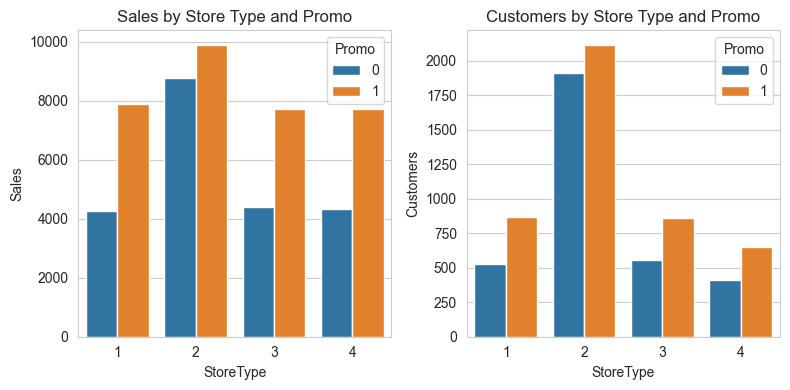

In [91]:
# Now, let's redo the grouping with the corrected StoreType column
store_type_promo_impact = train_store_merged_df.groupby(['StoreType', 'Promo'])[['Sales', 'Customers']].mean().reset_index()

# Plotting the impact of promos across different store types
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.barplot(x='StoreType', y='Sales', hue='Promo', data=store_type_promo_impact)
plt.title('Sales by Store Type and Promo')

plt.subplot(1, 2, 2)
sns.barplot(x='StoreType', y='Customers', hue='Promo', data=store_type_promo_impact)
plt.title('Customers by Store Type and Promo')

plt.tight_layout()
plt.show()


# ●	Trends of customer behavior during store open and closing times

DayOfWeek    int64
Open         int64
dtype: object


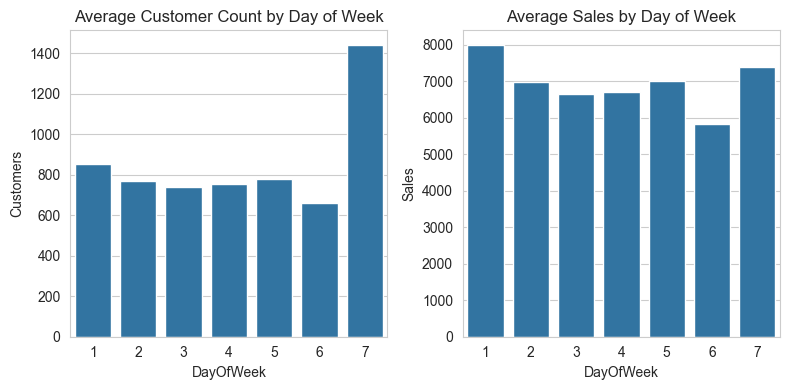

In [92]:
# Aggregate Data Based on Open Status and Day of the Week

# Ensure 'DayOfWeek' and 'Open' are available and correctly typed
print(train_store_merged_df[['DayOfWeek', 'Open']].dtypes)

# Aggregate data by 'Open' status and 'DayOfWeek'
open_days_data = train_store_merged_df[train_store_merged_df['Open'] == 1].groupby('DayOfWeek')[['Customers', 'Sales']].mean().reset_index()

# Visualizing customer behavior and sales trends on open days
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.barplot(x='DayOfWeek', y='Customers', data=open_days_data)
plt.title('Average Customer Count by Day of Week')

plt.subplot(1, 2, 2)
sns.barplot(x='DayOfWeek', y='Sales', data=open_days_data)
plt.title('Average Sales by Day of Week')

plt.tight_layout()
plt.show()


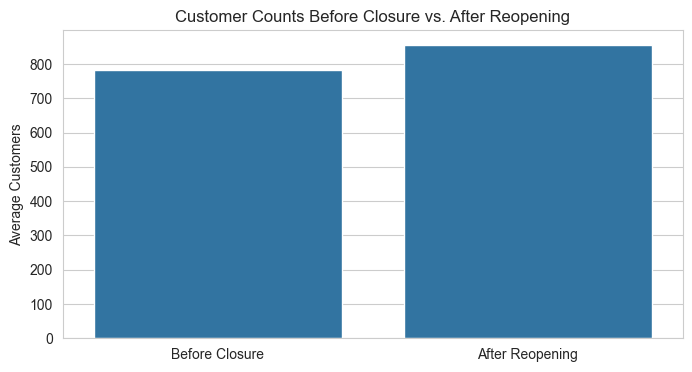

In [93]:
# Identify Trends Before and After Store Closures

# Assuming DayOfWeek 1 (Monday) is after reopening and 5 (Friday) is before closure.
before_closure = train_store_merged_df[(train_store_merged_df['DayOfWeek'] == 5) & (train_store_merged_df['Open'] == 1)]
after_reopening = train_store_merged_df[(train_store_merged_df['DayOfWeek'] == 1) & (train_store_merged_df['Open'] == 1)]

# Aggregate customer and sales data for these days
before_closure_agg = before_closure[['Customers', 'Sales']].mean()
after_reopening_agg = after_reopening[['Customers', 'Sales']].mean()

# Simple comparison plot
plt.figure(figsize=(8, 4))
x = ['Before Closure', 'After Reopening']
y = [before_closure_agg['Customers'], after_reopening_agg['Customers']]

sns.barplot(x=x, y=y)
plt.title('Customer Counts Before Closure vs. After Reopening')
plt.ylabel('Average Customers')
plt.show()

# ●	Which stores are opened on all weekdays? How does that affect their sales on weekends? 

In [94]:
# Filter for weekdays
weekday_data = train_store_merged_df[train_store_merged_df['DayOfWeek'].isin([2, 3, 4, 5, 6])]

# Filter for weekends
weekend_data = train_store_merged_df[train_store_merged_df['DayOfWeek'].isin([1, 7])]

In [95]:
# Here we're checking if a store has at least one record for each weekday

open_weekdays_stores = weekday_data.groupby('Store')['DayOfWeek'].nunique()
stores_open_all_weekdays = open_weekdays_stores[open_weekdays_stores == 5].index.tolist()

print(f"Stores open all weekdays: {stores_open_all_weekdays}")

Stores open all weekdays: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 2

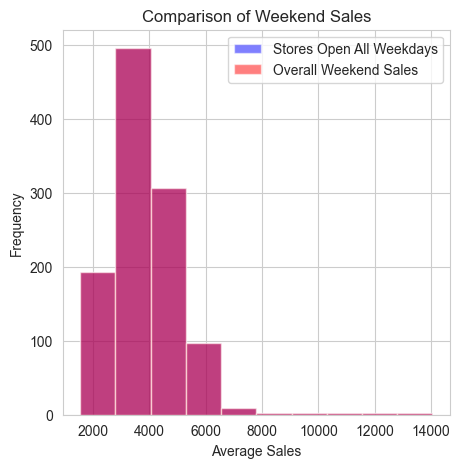

In [96]:
# Calculate average weekend sales for stores open all weekdays
weekend_sales_all_weekdays_open = weekend_data[weekend_data['Store'].isin(stores_open_all_weekdays)].groupby('Store')['Sales'].mean()

# Calculate overall average weekend sales
overall_weekend_sales = weekend_data.groupby('Store')['Sales'].mean()

# Plotting for comparison
plt.figure(figsize=(5, 5))

# Plot for stores open all weekdays
weekend_sales_all_weekdays_open.plot(kind='hist', alpha=0.5, color='blue', label='Stores Open All Weekdays')

# Plot for overall stores
overall_weekend_sales.plot(kind='hist', alpha=0.5, color='red', label='Overall Weekend Sales')

plt.title('Comparison of Weekend Sales')
plt.xlabel('Average Sales')
plt.legend()
plt.show()


# ●	Check how the assortment type affects sales

In [97]:
# Assuming 'Sales' are correctly aligned with the one-hot encoding of assortment types
assortment_types = ['a', 'b', 'c']
assortment_sales = {
    assortment: train_store_merged_df[train_store_merged_df[f'Assortment_{assortment}'] == 1]['Sales'].mean()
    for assortment in assortment_types
}


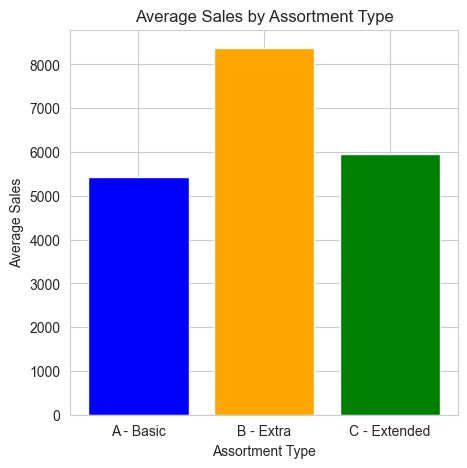

In [98]:
# Data preparation for plotting
assortment = list(assortment_sales.keys())
sales = list(assortment_sales.values())

# Plotting
plt.figure(figsize=(5, 5))
plt.bar(assortment, sales, color=['blue', 'orange', 'green'])
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.xticks(assortment, ['A - Basic', 'B - Extra', 'C - Extended'])
plt.show()

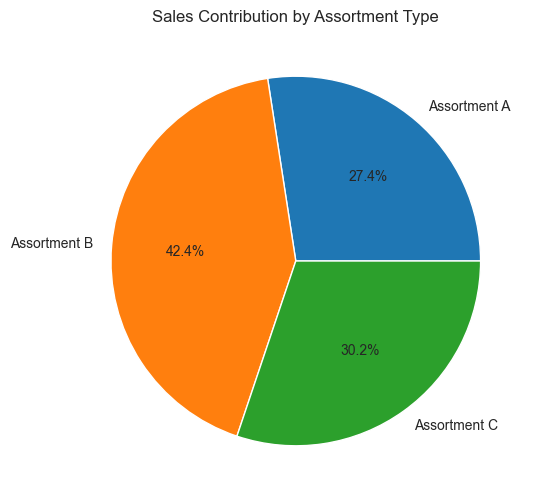

In [99]:
# Calculate total sales contribution
total_sales = sum(sales)
sales_contribution = {assortment: sales / total_sales for assortment, sales in assortment_sales.items()}

# Visualizing the contribution
plt.figure(figsize=(8, 6))
plt.pie(sales_contribution.values(), labels=[f'Assortment {k.upper()}' for k in sales_contribution.keys()], autopct='%1.1f%%')
plt.title('Sales Contribution by Assortment Type')
plt.show()


# ●	How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

In [100]:
# Sample categorization based on quantiles or specific logic
def categorize_distance(row):
    if row['CompetitionDistance'] <= 500:
        return 'Very Close'
    elif row['CompetitionDistance'] <= 1500:
        return 'Close'
    elif row['CompetitionDistance'] <= 3000:
        return 'Moderate'
    elif row['CompetitionDistance'] <= 5000:
        return 'Far'
    else:
        return 'Very Far'

# Apply the categorization
train_store_merged_df['DistanceCategory'] = train_store_merged_df.apply(categorize_distance, axis=1)

# Calculate average sales for each distance category
average_sales_by_distance = train_store_merged_df.groupby('DistanceCategory')['Sales'].mean()
average_sales_by_distance

DistanceCategory
Close         5570.413215
Far           5560.909905
Moderate      5580.630285
Very Close    6127.154561
Very Far      5598.465948
Name: Sales, dtype: float64

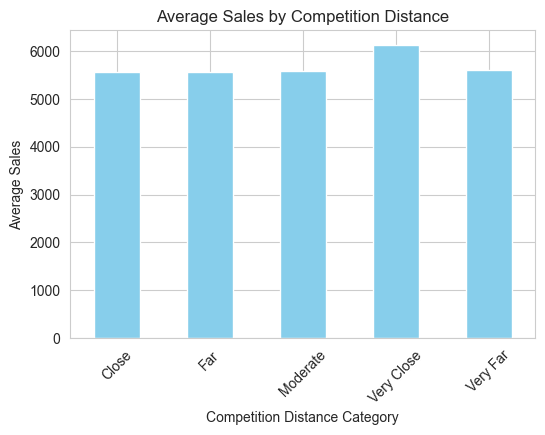

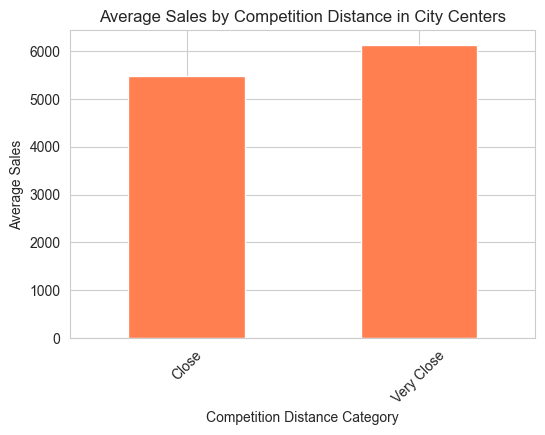

In [101]:
# Plotting
average_sales_by_distance.plot(kind='bar', figsize=(6, 4), color='skyblue')
plt.title('Average Sales by Competition Distance')
plt.xlabel('Competition Distance Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

# Assuming you have a way to filter city center stores, let's proceed with a simplified filter
# This could be a placeholder for more complex logic
is_city_center = (train_store_merged_df['CompetitionDistance'] <= 1000) # Example condition
city_center_stores_sales = train_store_merged_df[is_city_center].groupby('DistanceCategory')['Sales'].mean()

# Plotting for city center stores
city_center_stores_sales.plot(kind='bar', figsize=(6, 4), color='coral')
plt.title('Average Sales by Competition Distance in City Centers')
plt.xlabel('Competition Distance Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

# ●	How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance




In [102]:
# Identify stores with updated 'CompetitionDistance' from NaN to a value
train_store_merged_df['CompetitionDistanceUpdated'] = train_store_merged_df['CompetitionDistance'].notna() & train_store_merged_df['CompetitionDistance'].fillna(method='bfill').shift(-1).notna()

# For simplicity in this example, assume updates occur once and affect immediately
affected_stores = train_store_merged_df[train_store_merged_df['CompetitionDistanceUpdated']].Store.unique()

# Analyze impact for each affected store
for store in affected_stores:
    # Extract rows for the store
    store_data = train_store_merged_df[train_store_merged_df['Store'] == store]
    
    # Find the index of the update
    update_index = store_data[store_data['CompetitionDistanceUpdated']].index.min()
    
    # Compare sales before and after the update
    before_update_sales = store_data.loc[:update_index-1, 'Sales'].mean()
    after_update_sales = store_data.loc[update_index:, 'Sales'].mean()
    
    print(f"Store {store}: Before Update Sales = {before_update_sales}, After Update Sales = {after_update_sales}")

Store 1: Before Update Sales = nan, After Update Sales = 3945.704883227176
Store 2: Before Update Sales = nan, After Update Sales = 4122.991507430997
Store 3: Before Update Sales = nan, After Update Sales = 5737.905520169851
Store 4: Before Update Sales = nan, After Update Sales = 7986.484076433121
Store 5: Before Update Sales = nan, After Update Sales = 3867.1104033970278
Store 6: Before Update Sales = nan, After Update Sales = 4562.375796178344
Store 7: Before Update Sales = nan, After Update Sales = 7323.485668789809
Store 8: Before Update Sales = nan, After Update Sales = 4610.251592356688
Store 9: Before Update Sales = nan, After Update Sales = 5426.816348195329
Store 10: Before Update Sales = nan, After Update Sales = 4634.4394904458595
Store 11: Before Update Sales = nan, After Update Sales = 6628.545647558386
Store 12: Before Update Sales = nan, After Update Sales = 6312.682590233546
Store 13: Before Update Sales = nan, After Update Sales = 4124.77308707124
Store 14: Before Upd

In [103]:
from scipy.stats import ttest_ind

results = []

for store in affected_stores:
    store_data = train_store_merged_df[train_store_merged_df['Store'] == store]
    update_index = store_data[store_data['CompetitionDistanceUpdated']].index.min()
    
    before_sales = store_data.loc[:update_index-1, 'Sales']
    after_sales = store_data.loc[update_index:, 'Sales']
    
    # Perform t-test
    t_stat, p_value = ttest_ind(before_sales, after_sales, equal_var=False)
    
    results.append((store, t_stat, p_value))
    (f"Store {store}: t-statistic = {t_stat:.2f}, p-value = {p_value:.3f}")

# Convert results to DataFrame for nicer display
results_df = pd.DataFrame(results, columns=['Store', 'T-Statistic', 'P-Value'])
results_df


,Store,T-Statistic,P-Value
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN
...,...,...,...
1110,1111,NaN,NaN
1111,1112,NaN,NaN
1112,1113,NaN,NaN
1113,1114,NaN,NaN


In [104]:
# Specify the file name
file_name = 'competition_effect_analysis.csv'

# Save the DataFrame to a CSV file
results_df.to_csv(file_name, index=True)

print(f'Data saved to {file_name}')

Data saved to competition_effect_analysis.csv
